In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


In [2]:
# Train and fine-tune a Decision Tree for the moons dataset.
# a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)


In [3]:
# b. Split it into a training set and a test set using train_test_split().
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
#c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. 
# Hint: try various values for max_leaf_nodes.
param_grid = {
    'max_leaf_nodes': [None, 5, 10, 20, 30, 40, 50]  # Vary max_leaf_nodes
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_ # Get the good hyperparameters
best_max_leaf_nodes = best_params['max_leaf_nodes']


In [5]:
# d. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set.
best_dt_classifier = DecisionTreeClassifier(max_leaf_nodes=best_max_leaf_nodes, random_state=42)
best_dt_classifier.fit(X_train, y_train)

accuracy = best_dt_classifier.score(X_test, y_test) # Measure the model's performance on the test set

print("Best max_leaf_nodes:", best_max_leaf_nodes)
print("Accuracy on the test set:", accuracy)

Best max_leaf_nodes: 20
Accuracy on the test set: 0.87


In [6]:
# Now we will do the samething again but we will manually find the "max_leaf_node" where we get the best accuracy
max_leaf_nodes_range = [None,5, 10, 20, 30, 40, 50]

accuracies = []

# Iterate through different max_leaf_nodes values
for max_leaf_nodes in max_leaf_nodes_range:
    # Create a DecisionTreeClassifier with the current max_leaf_nodes value
    tree_classifier = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    
    # Fit the model on the training data
    tree_classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = tree_classifier.predict(X_test)
    
    # Calculate accuracy on the test set and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(accuracy)

0.8145
0.863
0.863
0.87
0.8735
0.8695
0.8615


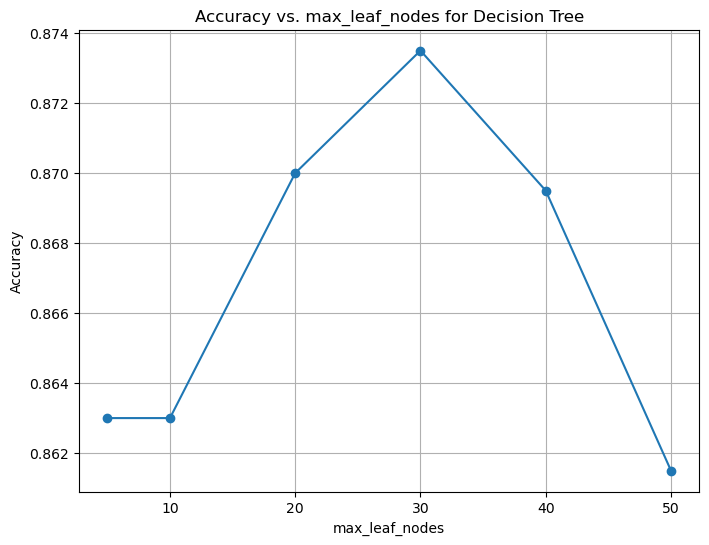

In [7]:
# Create a plot to visualize the accuracy vs. max_leaf_nodes
plt.figure(figsize=(8,6))
plt.plot(max_leaf_nodes_range, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. max_leaf_nodes for Decision Tree')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.xticks(max_leaf_nodes_range)
plt.show()


# We observe that we find the best accuracy at "max_leaf_node" = "30"